# EXPLORACION DE DATOS

### ANALISIS EXPLORATORIO DE DATOS

In [15]:
###PASO 4
#0 importacion de librerias
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from math import factorial
from scipy import stats as st
from scipy.stats import levene, ttest_ind
#1 importar de archivo
df1=pd.read_csv('/datasets/project_sql_result_01.csv')
df2=pd.read_csv('/datasets/project_sql_result_04.csv')
df3=pd.read_csv('/datasets/project_sql_result_07.csv')
#visualizacion de la informacion de los dataframe y sus datos
df1.info(show_counts=True)
print(df1.head())
df2.info(show_counts=True)
print(df2.head())
df3.info(show_counts=True)
print(df3.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
  dropoff_location_name 

In [16]:
#consulta para sacar el ranking de los 10 barrios con mayor numero de viajes
top10_barrios = df2.sort_values(by='average_trips', ascending=False).head(10)
print(top10_barrios)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


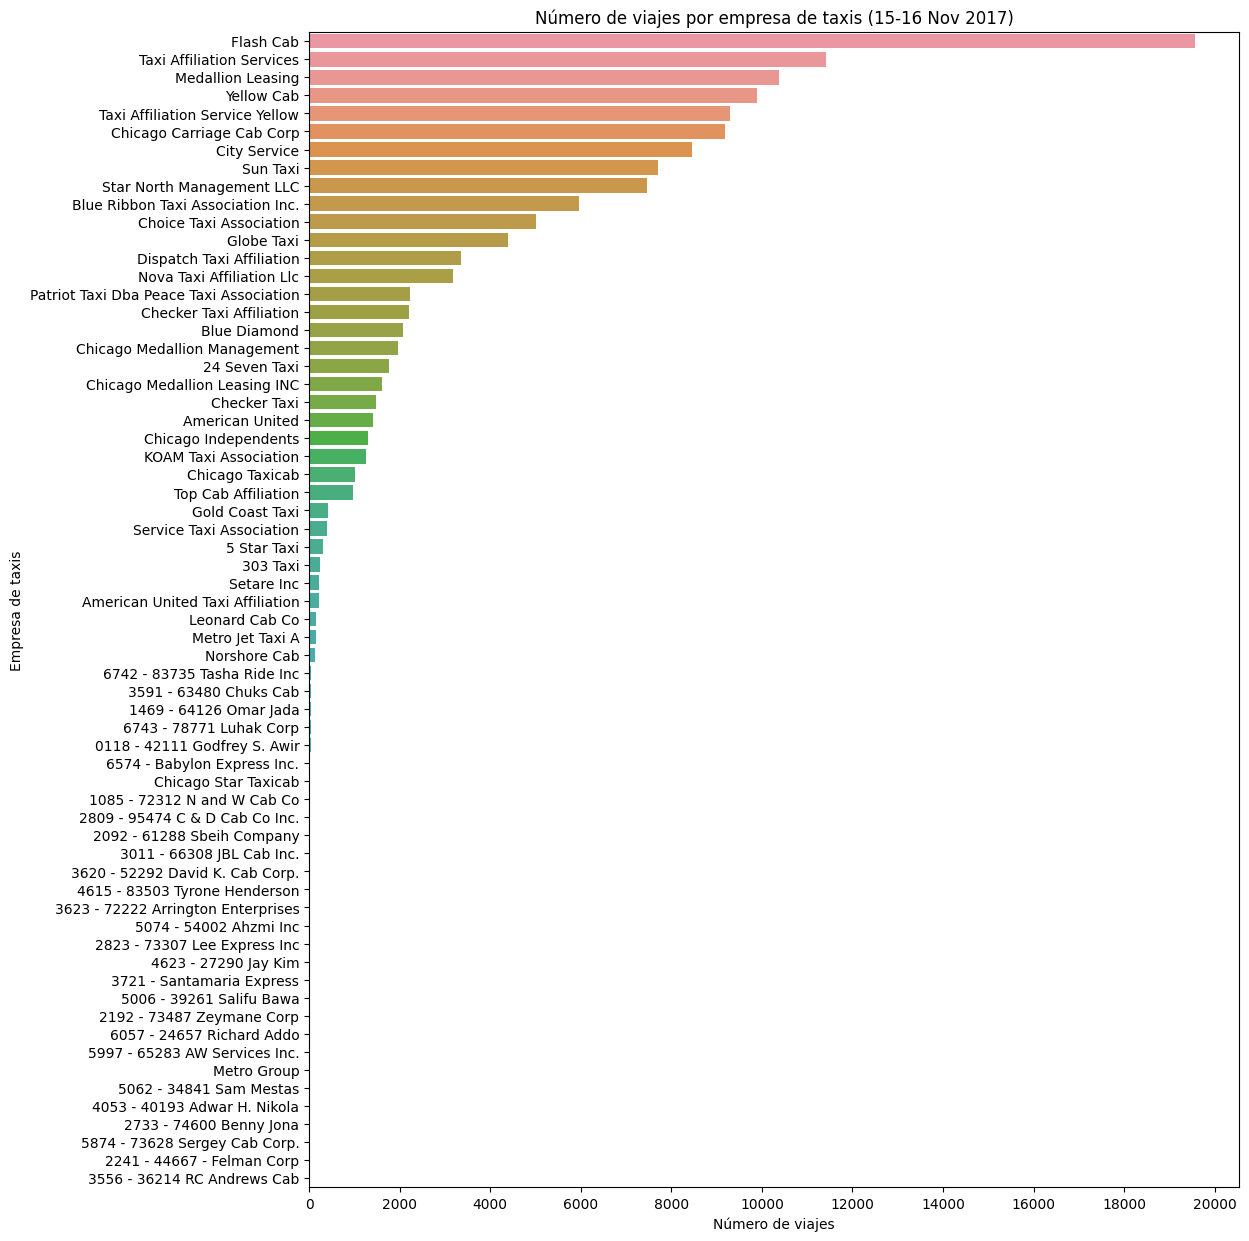

In [17]:
#Elaboracion de grafico para saber el numero de viajes realizados por cada empresa de taxis
plt.figure(figsize=(12, 15))
sns.barplot(data=df1, x='trips_amount', y='company_name')
plt.title('Número de viajes por empresa de taxis (15-16 Nov 2017)')
plt.xlabel('Número de viajes')
plt.ylabel('Empresa de taxis')
plt.xticks(np.arange(0,21000,2000))
plt.show()

Se observa en el grafico que la empresa que supera en cuanto a cantidad de viajes es "Flash Cab" y luego venos a mas de 30 empresas que su numero de viajes va decreciendo, posterior a ellos vemos otras empresas que ya no tienen mucha presencia e cuanto a su numero de viajes con respecto a los demas.

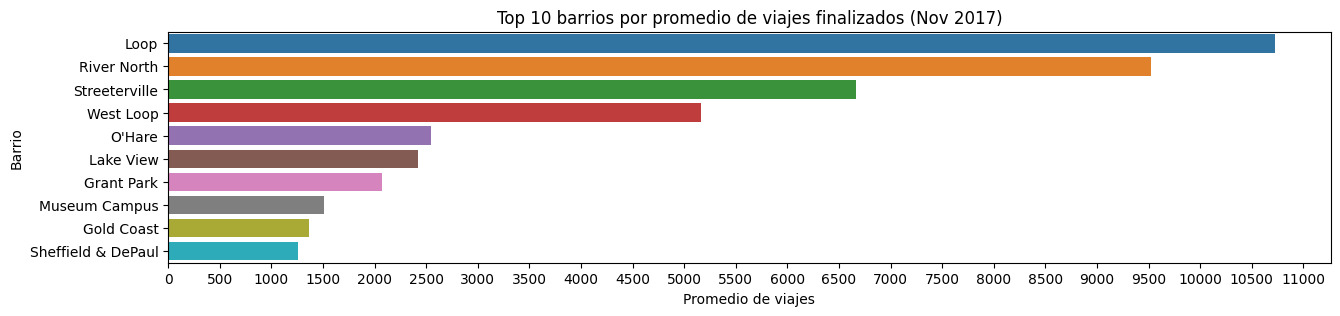

In [18]:
##Elaboracion de grafico para la consulta de los 10 barrios con mayor numero de viajes
plt.figure(figsize=(15, 3))
sns.barplot(data=top10_barrios, x='average_trips', y='dropoff_location_name')
plt.title('Top 10 barrios por promedio de viajes finalizados (Nov 2017)')
plt.xlabel('Promedio de viajes')
plt.ylabel('Barrio')
plt.xticks(np.arange(0,11001,500))
plt.show()

En el presente grafico podemos observar el ranking de los 10 barrios con los mejores promedios de viajes finalizados, en primero lugar tenemos al barrio Loop con un promedio de viajes superior a 10500, asi tenemos a los otras 3 barrios que tienen promedios de viaje supeiores a 9500, 6500 y 5000 respectivamente, seguidamente de los otros 6 barrios que tienen un promedio al rededor de 1250 a 3000.

### PRUEBA DE HIPOTESIS

In [19]:
#PASO 5
#cambio de tipo de dato en los columnas start_ts a datetime y duration_seconds a int
df3['start_ts'] = pd.to_datetime(df3['start_ts'])
df3['duration_seconds']=df3['duration_seconds'].astype('int')
df3.info(show_counts=True)
print(df3.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 25.2+ KB
             start_ts weather_conditions  duration_seconds
0 2017-11-25 16:00:00               Good              2410
1 2017-11-25 14:00:00               Good              1920
2 2017-11-25 12:00:00               Good              1543
3 2017-11-04 10:00:00               Good              2512
4 2017-11-11 07:00:00               Good              1440


In [20]:
#validacion de los viajes que fueron realizados en esas fechas sean correspondientes a dia sabado
df3['weekday'] = df3['start_ts'].dt.dayofweek  # 5 = sábado
sabados = df3[df3['weekday'] == 5]
print(sabados)

                start_ts weather_conditions  duration_seconds  weekday
0    2017-11-25 16:00:00               Good              2410        5
1    2017-11-25 14:00:00               Good              1920        5
2    2017-11-25 12:00:00               Good              1543        5
3    2017-11-04 10:00:00               Good              2512        5
4    2017-11-11 07:00:00               Good              1440        5
...                  ...                ...               ...      ...
1063 2017-11-25 11:00:00               Good                 0        5
1064 2017-11-11 10:00:00               Good              1318        5
1065 2017-11-11 13:00:00               Good              2100        5
1066 2017-11-11 08:00:00               Good              1380        5
1067 2017-11-04 16:00:00                Bad              2834        5

[1068 rows x 4 columns]


In [21]:
#segmentacion de datos en base a los dias sabados si fueron en días buenos o dias malos segpun la columna weather_conditions
lluvioso_sab = sabados[sabados['weather_conditions'] == 'Bad']
no_lluviosos_sab = sabados[sabados['weather_conditions'] == 'Good']
alpha = 0.05
#Prueba de Levene: igualdad de varianzas
levene_stat, levene_p =levene(lluvioso_sab['duration_seconds'], no_lluviosos_sab['duration_seconds'])

print("Prueba de Levene:")
print(f"Valor p: {levene_p:.4f}")

if levene_p < alpha:
    print("Rechazamos la hipótesis nula: las varianzas no son iguales.")
    equal_var = False
else:
    print("No se rechaza la hipótesis nula: las varianzas son iguales.")
    equal_var = True

#comparacion entre ambas condiciones con respecto a la duracion del viaje
results = st.ttest_ind(lluvioso_sab['duration_seconds'], no_lluviosos_sab['duration_seconds'],equal_var=equal_var)

# extraer el valor p
print('valor p: ', results.pvalue) 
# comparar el valor p con el umbral alpha
if results.pvalue < alpha: 
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

Prueba de Levene:
Valor p: 0.5332
No se rechaza la hipótesis nula: las varianzas son iguales.
valor p:  6.517970327099473e-12
Rechazamos la hipótesis nula


Existe una diferencia estadísticamente significativa en la duración promedio de los viajes entre sábados lluviosos y sábados no lluviosos.
Esto significa que el clima lluvioso sí afecta el tiempo promedio de traslado entre el Loop y el Aeropuerto O’Hare.